<h1 style="text-align: center;">Weather-Related Disease Prediction</h1>

#### Import the required modules and functions

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, ConfusionMatrixDisplay,precision_score,f1_score,recall_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.svm import SVC
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset
 Here,  load the dataset from a CSV file. The dataset contains weather-related disease prediction data which will be used for training and testing our machine learning models.


In [25]:
data=pd.read_csv(r"C:\Users\sanik\Downloads\Weather-related disease prediction.csv")
data

,Age,Gender,Temperature (C),Humidity,Wind Speed (km/h),nausea,joint_pain,abdominal_pain,high_fever,chills,...,facial_pain,shortness_of_breath,reduced_smell_and_taste,skin_irritation,itchiness,throbbing_headache,confusion,back_pain,knee_ache,prognosis
0,4,1,25.826000,0.740000,8.289000,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Heart Attack
1,55,0,21.628000,0.600000,15.236000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,Influenza
2,45,0,13.800000,0.817083,4.291992,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Influenza
3,6,0,37.254000,0.610000,18.009000,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Dengue
4,70,0,18.162000,0.870000,17.916000,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Sinusitis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,91,1,21.714000,0.870000,5.450000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,Arthritis
5196,83,0,10.491000,0.920000,9.165000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Stroke
5197,77,0,19.942824,0.744583,9.305129,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Influenza
5198,84,0,20.069000,0.850000,17.971000,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,Heart Attack


## Exploratory Data Analysis

This step displays the first few and last few rows of the dataset to understand its structure, number of features, and data types.


In [40]:
data.head()

,Age,Gender,Temperature (C),Humidity,Wind Speed (km/h),nausea,joint_pain,abdominal_pain,high_fever,chills,...,facial_pain,shortness_of_breath,reduced_smell_and_taste,skin_irritation,itchiness,throbbing_headache,confusion,back_pain,knee_ache,prognosis
0,4,1,25.826,0.740000,8.289000,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Heart Attack
1,55,0,21.628,0.600000,15.236000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,Influenza
2,45,0,13.800,0.817083,4.291992,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Influenza
3,6,0,37.254,0.610000,18.009000,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Dengue
4,70,0,18.162,0.870000,17.916000,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Sinusitis


In [41]:
data.tail()

,Age,Gender,Temperature (C),Humidity,Wind Speed (km/h),nausea,joint_pain,abdominal_pain,high_fever,chills,...,facial_pain,shortness_of_breath,reduced_smell_and_taste,skin_irritation,itchiness,throbbing_headache,confusion,back_pain,knee_ache,prognosis
5195,91,1,21.714000,0.870000,5.450000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,Arthritis
5196,83,0,10.491000,0.920000,9.165000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Stroke
5197,77,0,19.942824,0.744583,9.305129,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Influenza
5198,84,0,20.069000,0.850000,17.971000,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,Heart Attack
5199,100,1,38.021000,0.750000,18.300000,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,Eczema


In [42]:
data.shape

(5200, 51)

In [43]:
data.columns

Index(['Age', 'Gender', 'Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'nausea', 'joint_pain', 'abdominal_pain', 'high_fever', 'chills',
       'fatigue', 'runny_nose', 'pain_behind_the_eyes', 'dizziness',
       'headache', 'chest_pain', 'vomiting', 'cough', 'shivering',
       'asthma_history', 'high_cholesterol', 'diabetes', 'obesity', 'hiv_aids',
       'nasal_polyps', 'asthma', 'high_blood_pressure', 'severe_headache',
       'weakness', 'trouble_seeing', 'fever', 'body_aches', 'sore_throat',
       'sneezing', 'diarrhea', 'rapid_breathing', 'rapid_heart_rate',
       'pain_behind_eyes', 'swollen_glands', 'rashes', 'sinus_headache',
       'facial_pain', 'shortness_of_breath', 'reduced_smell_and_taste',
       'skin_irritation', 'itchiness', 'throbbing_headache', 'confusion',
       'back_pain', 'knee_ache', 'prognosis'],
      dtype='object')

Explore the dataset's structure, data types, missing values, and basic statistical properties using `.info()` and `.describe()`. This helps identify columns that need cleaning or encoding.


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      5200 non-null   int64  
 1   Gender                   5200 non-null   int64  
 2   Temperature (C)          5200 non-null   float64
 3   Humidity                 5200 non-null   float64
 4   Wind Speed (km/h)        5200 non-null   float64
 5   nausea                   5200 non-null   int64  
 6   joint_pain               5200 non-null   int64  
 7   abdominal_pain           5200 non-null   int64  
 8   high_fever               5200 non-null   int64  
 9   chills                   5200 non-null   int64  
 10  fatigue                  5200 non-null   int64  
 11  runny_nose               5200 non-null   int64  
 12  pain_behind_the_eyes     5200 non-null   int64  
 13  dizziness                5200 non-null   int64  
 14  headache                

In [45]:
data.describe()

,Age,Gender,Temperature (C),Humidity,Wind Speed (km/h),nausea,joint_pain,abdominal_pain,high_fever,chills,...,sinus_headache,facial_pain,shortness_of_breath,reduced_smell_and_taste,skin_irritation,itchiness,throbbing_headache,confusion,back_pain,knee_ache
count,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,...,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000
mean,51.383269,0.511731,19.943117,0.744873,10.708818,0.155385,0.065769,0.040000,0.101731,0.062885,...,0.030769,0.035192,0.032500,0.032692,0.033077,0.029615,0.037115,0.066346,0.035192,0.038077
std,26.625863,0.499910,11.414905,0.142860,5.686331,0.362306,0.247902,0.195978,0.302323,0.242779,...,0.172708,0.184283,0.177341,0.177847,0.178855,0.169540,0.189063,0.248910,0.184283,0.191400
min,1.000000,0.000000,-15.125000,0.370833,0.008000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,12.184500,0.624479,6.414508,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53.000000,1.000000,20.017500,0.750000,10.152500,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,74.000000,1.000000,28.465250,0.860000,15.061550,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,1.000000,40.996000,1.000000,31.303096,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
data['prognosis'].value_counts()

prognosis
Heart Attack    1013
Migraine         941
Influenza        658
Heat Stroke      338
Malaria          330
Stroke           329
Eczema           327
Dengue           322
Common Cold      321
Arthritis        311
Sinusitis        310
Name: count, dtype: int64

check for missing values and handle them appropriately to ensure data quality and avoid issues during model training.


In [47]:
data.isnull().sum()

Age                        0
Gender                     0
Temperature (C)            0
Humidity                   0
Wind Speed (km/h)          0
nausea                     0
joint_pain                 0
abdominal_pain             0
high_fever                 0
chills                     0
fatigue                    0
runny_nose                 0
pain_behind_the_eyes       0
dizziness                  0
headache                   0
chest_pain                 0
vomiting                   0
cough                      0
shivering                  0
asthma_history             0
high_cholesterol           0
diabetes                   0
obesity                    0
hiv_aids                   0
nasal_polyps               0
asthma                     0
high_blood_pressure        0
severe_headache            0
weakness                   0
trouble_seeing             0
fever                      0
body_aches                 0
sore_throat                0
sneezing                   0
diarrhea      

check if the dataset contains any duplicate rows using the `.duplicated()` method. If found, remove them using `.drop_duplicates()` to ensure that repeated data doesn't bias the model or reduce accuracy.


In [26]:
data.duplicated().sum()

np.int64(219)

In [27]:
data.drop_duplicates(inplace=True)

 perform univariate analysis on the numerical features in the dataset. For each feature (Age, Temperature, Humidity, and Wind Speed), we plot:

- A **Histogram with KDE (Kernel Density Estimate)** to observe the distribution of values.
- A **Boxplot** to detect the presence of outliers.

This helps us understand the shape, spread, and skewness of the data, as well as any anomalies that might affect model performance.


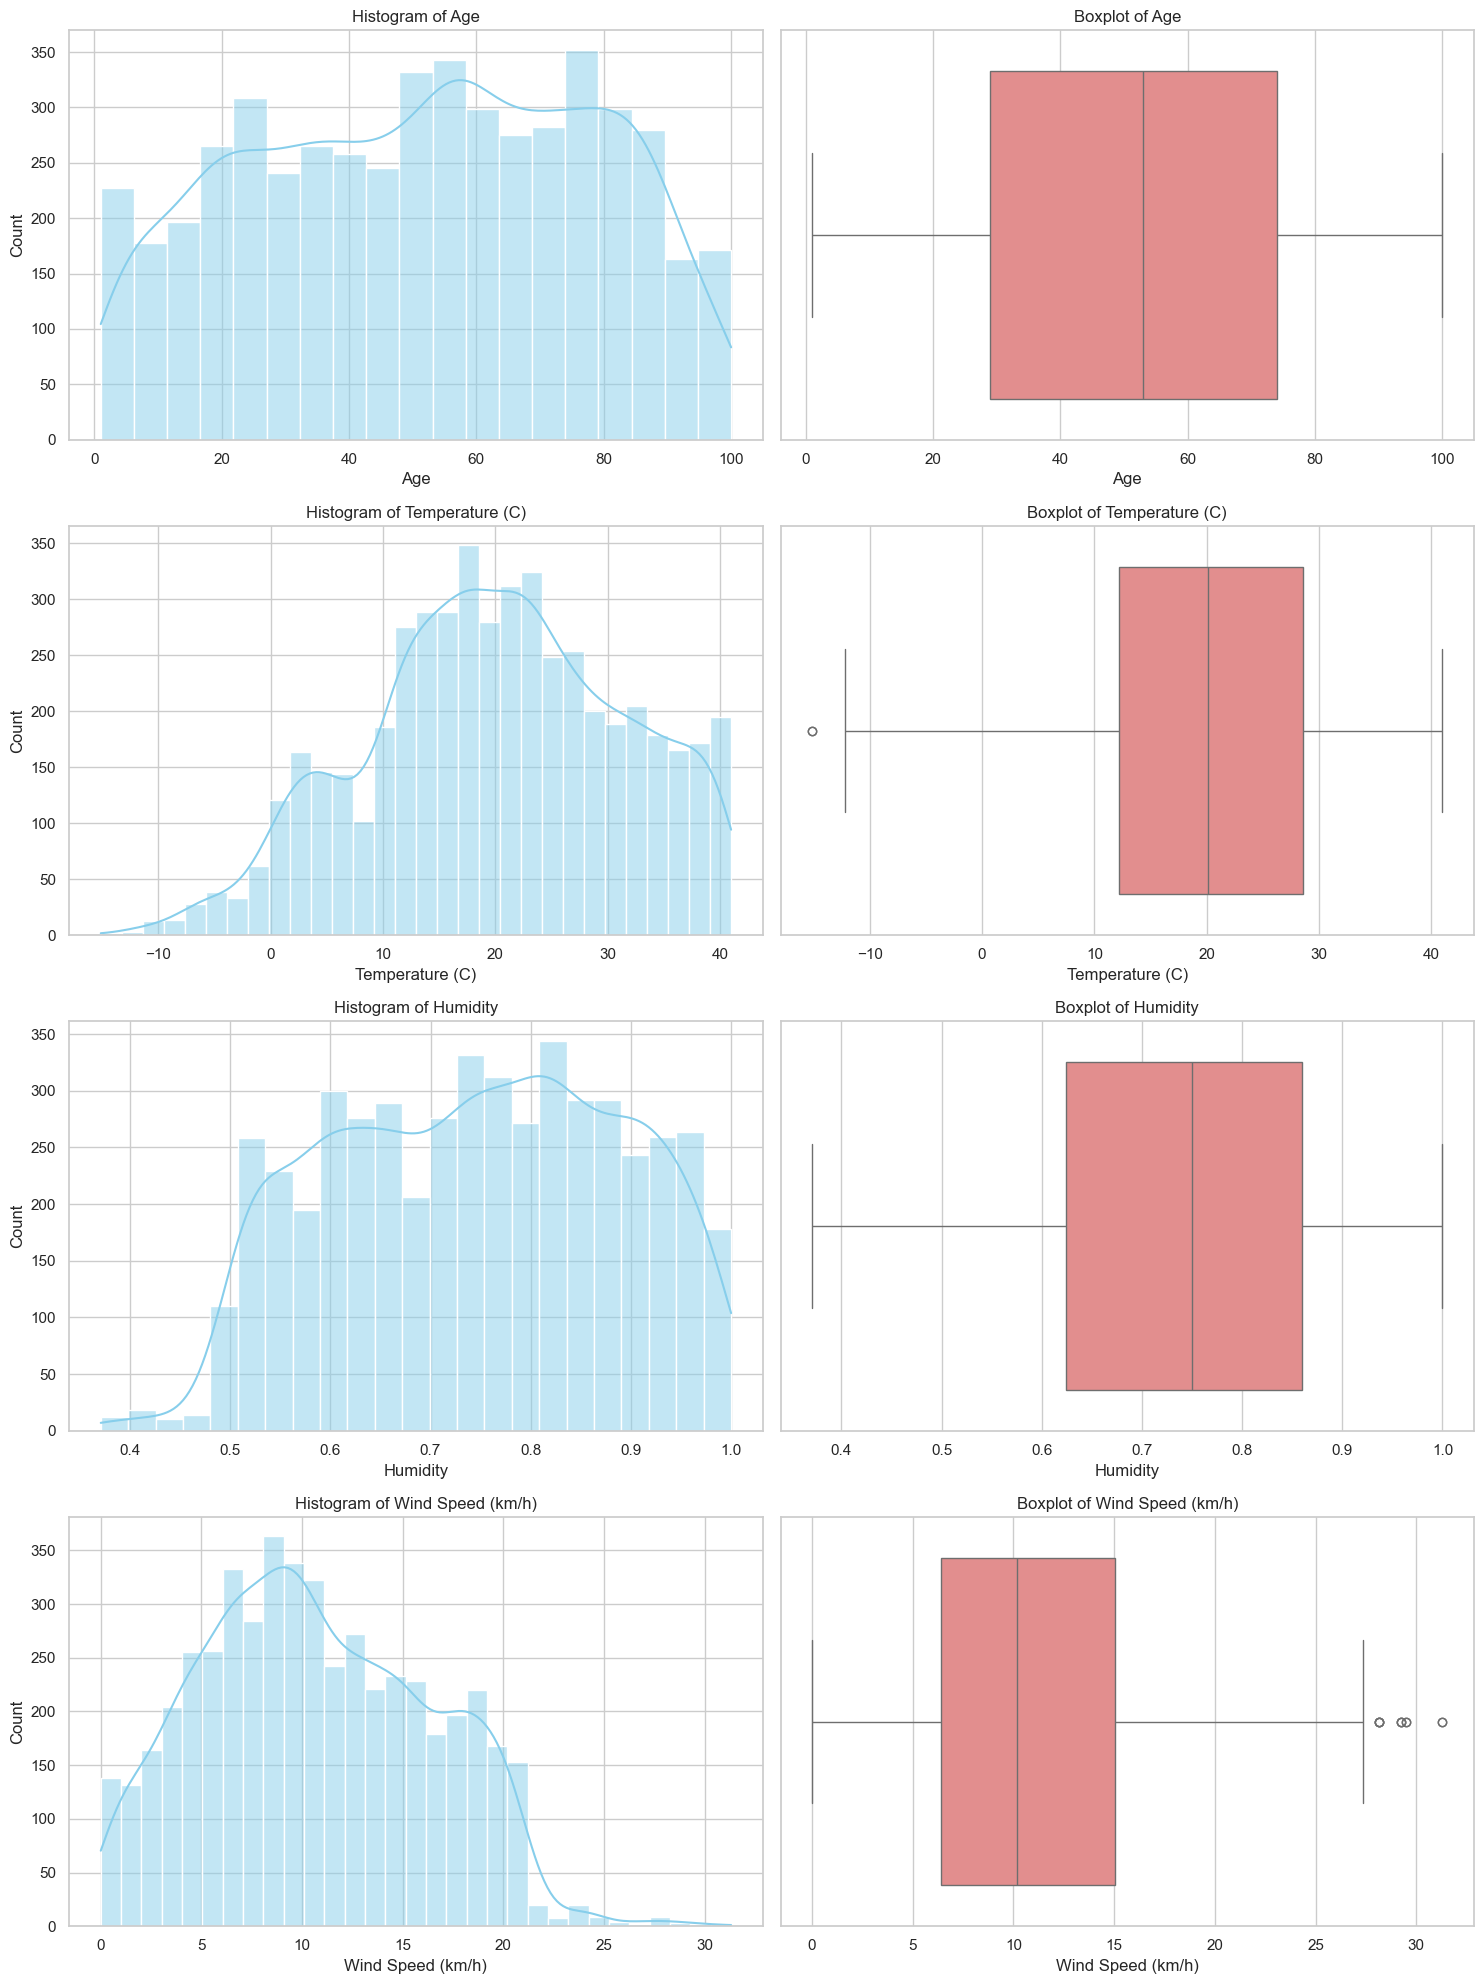

In [50]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

numerical_cols = ['Age', 'Temperature (C)', 'Humidity', 'Wind Speed (km/h)']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
for i, col in enumerate(numerical_cols):
    sns.histplot(data[col], kde=True, ax=axes[i][0], color='skyblue')
    axes[i][0].set_title(f'Histogram of {col}')
    
    sns.boxplot(x=data[col], ax=axes[i][1], color='lightcoral')
    axes[i][1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


Symptom Frequency per Disease — Heatmap Analysis

This heatmap shows the normalized frequency of each symptom across different diseases. Darker colors mean higher frequency (closer to 1.0), while light colors indicate rare or absent symptoms.

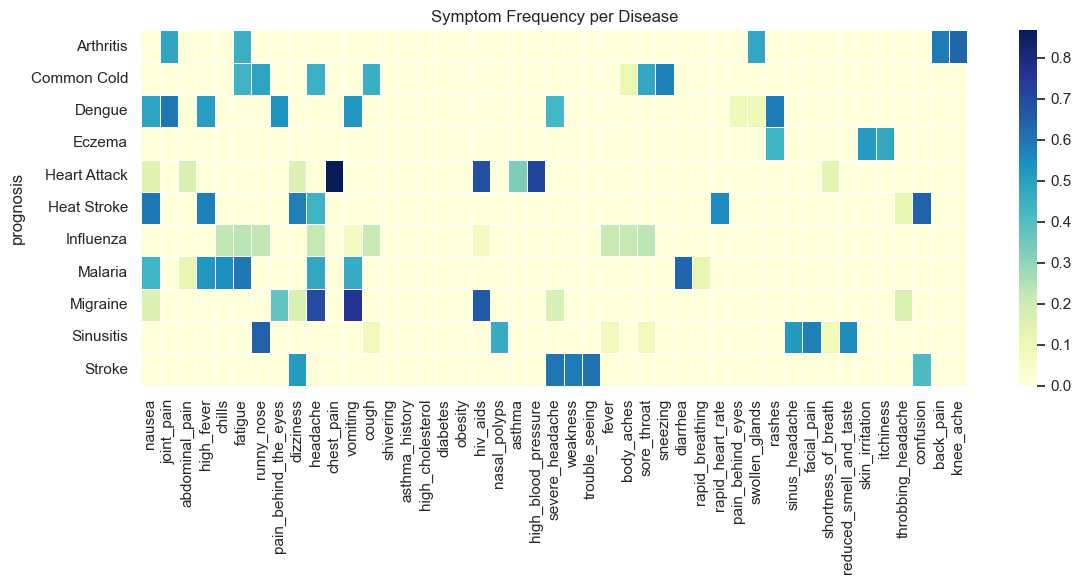

In [52]:
plt.figure(figsize=(12, 6))
symptom_freq = data.groupby('prognosis')[['nausea', 'joint_pain', 'abdominal_pain', 'high_fever', 'chills',
       'fatigue', 'runny_nose', 'pain_behind_the_eyes', 'dizziness',
       'headache', 'chest_pain', 'vomiting', 'cough', 'shivering',
       'asthma_history', 'high_cholesterol', 'diabetes', 'obesity', 'hiv_aids',
       'nasal_polyps', 'asthma', 'high_blood_pressure', 'severe_headache',
       'weakness', 'trouble_seeing', 'fever', 'body_aches', 'sore_throat',
       'sneezing', 'diarrhea', 'rapid_breathing', 'rapid_heart_rate',
       'pain_behind_eyes', 'swollen_glands', 'rashes', 'sinus_headache',
       'facial_pain', 'shortness_of_breath', 'reduced_smell_and_taste',
       'skin_irritation', 'itchiness', 'throbbing_headache', 'confusion',
       'back_pain', 'knee_ache']].mean()


sns.heatmap(symptom_freq, cmap='YlGnBu', linewidths=0.5)
plt.title("Symptom Frequency per Disease")
plt.tight_layout()
plt.show()

###   Label Encoding for Categorical Variables
We use `LabelEncoder` to convert categorical columns  into numeric values, making them suitable for machine learning algorithms.


In [28]:
l=LabelEncoder()

In [29]:
data['prognosis'] = l.fit_transform(data['prognosis'])

### Splitting the Dataset
We divide the dataset into training and testing sets using an 80-20 split. This is crucial for evaluating model performance on unseen data.

In [30]:
x=data.drop('prognosis',axis=1)

In [31]:
y=data[['prognosis']]

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Feature Scaling
To improve model performance and ensure that all features contribute equally, we apply standardization using `StandardScaler`.


In [33]:
sc=StandardScaler()

In [34]:
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

##            Model Selection

### LogisticRegression

In [36]:
model1=LogisticRegression()

In [37]:
model1.fit(x_train_sc,y_train)

LogisticRegression()

In [38]:
y_pred_train=model1.predict(x_train_sc)

In [39]:
accuracy_score(y_train,y_pred_train)

0.9796686746987951

In [40]:
y_pred=model1.predict(x_test_sc)

In [41]:
accuracy_score(y_test,y_pred)

0.9859578736208626

In [42]:
print(LogisticRegression)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy :' ,accuracy	,
      '\nPrecision :',precision,
      '\nRecall :',recall,
      '\nF1-Score :', f1)

<class 'sklearn.linear_model._logistic.LogisticRegression'>
Accuracy : 0.9859578736208626 
Precision : 0.9862085615135732 
Recall : 0.9859578736208626 
F1-Score : 0.9859474791805979


### RandomForest

In [43]:
model2=RandomForestClassifier(n_estimators=100)

In [44]:
model2.fit(x_train_sc,y_train)

RandomForestClassifier()

In [45]:
y_pred_train=model2.predict(x_train_sc)

In [46]:
accuracy_score(y_train,y_pred_train)

1.0

In [47]:
y_pred=model2.predict(x_test_sc)

In [48]:
accuracy_score(y_test,y_pred)

0.9919759277833501

In [50]:
print('Random Forest Classifier')
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy :' ,accuracy	,
      '\nPrecision :',precision,
      '\nRecall :',recall,
      '\nF1-Score :', f1)

Random Forest Classifier
Accuracy : 0.9919759277833501 
Precision : 0.9921814415388414 
Recall : 0.9919759277833501 
F1-Score : 0.992002652591976


In [51]:
#n_estimators=400,
    # max_depth=30,min_samples_split=5,
    # min_samples_leaf=2,max_features='sqrt',
    # bootstrap=False,random_state=42

### SVM

In [52]:
model3=SVC(kernel='rbf')

In [53]:
model3.fit(x_train_sc,y_train)

SVC()

In [54]:
y_pred_train=model3.predict(x_train_sc)

In [55]:
accuracy_score(y_train,y_pred_train)

0.9801706827309237

In [56]:
y_pred=model3.predict(x_test_sc)

In [57]:
accuracy_score(y_test,y_pred)

0.9829488465396189

In [58]:
print(SVC)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy :' ,accuracy	,
      '\nPrecision :',precision,
      '\nRecall :',recall,
      '\nF1-Score :', f1)

<class 'sklearn.svm._classes.SVC'>
Accuracy : 0.9829488465396189 
Precision : 0.9836218381685875 
Recall : 0.9829488465396189 
F1-Score : 0.9828952265152646


### XGBOOST

In [59]:
model4=XGBClassifier(use_label_encoder=False)

In [60]:
model4.fit(x_train_sc,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [61]:
y_pred_train=model4.predict(x_train_sc)

In [62]:
accuracy_score(y_train,y_pred_train)

1.0

In [63]:
y_pred=model4.predict(x_test_sc)

In [64]:
accuracy_score(y_test,y_pred)

0.9899699097291875

In [66]:
print('XG Boost Classifier')
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy :' ,accuracy	,
      '\nPrecision :',precision,
      '\nRecall :',recall,
      '\nF1-Score :', f1)

XG Boost Classifier
Accuracy : 0.9899699097291875 
Precision : 0.9900066977247532 
Recall : 0.9899699097291875 
F1-Score : 0.989967342368325


In [67]:



models = {
    "Logistic Regression": model1,
    "Random Forest": model2,
    "SVC": model3,
    "XGBoost": model4}


results = []

for name,model in models.items():
    model.fit(x_train_sc, y_train)
    y_pred = model.predict(x_test_sc)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average='weighted')
    recall = recall_score(y_test, y_pred,average='weighted')
    f1 = f1_score(y_test, y_pred,average='weighted')

    results.append({
        "Model": name,
        "Accuracy": round(accuracy, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "F1-Score": round(f1, 4)
    })

# Convert to DataFrame
import pandas as pd
results_df = pd.DataFrame(results)


In [68]:
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.9860,0.9862,0.9860,0.9859
1,Random Forest,0.9920,0.9922,0.9920,0.9920
2,SVC,0.9829,0.9836,0.9829,0.9829
3,XGBoost,0.9900,0.9900,0.9900,0.9900


### Hyperparameter Tuning

In [63]:
rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(x_train_sc, y_train)

print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


{'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}

## Model Building

In [69]:
model=RandomForestClassifier(bootstrap=False, max_depth= None, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 5, n_estimators= 300)

In [70]:
model.fit(x_train_sc,y_train)

RandomForestClassifier(bootstrap=False, min_samples_split=5, n_estimators=300)

In [71]:
y_pred_train=model.predict(x_train_sc)

In [72]:
accuracy_score(y_train,y_pred_train)

1.0

In [73]:
y_pred=model.predict(x_test_sc)

## Model Evaluation

In [74]:
accuracy_score(y_test,y_pred)

0.9929789368104313

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       0.93      1.00      0.97        56
           2       0.98      1.00      0.99        54
           3       1.00      1.00      1.00        63
           4       0.99      1.00      0.99       188
           5       1.00      0.97      0.98        61
           6       1.00      0.97      0.98       128
           7       1.00      0.98      0.99        57
           8       1.00      1.00      1.00       191
           9       1.00      1.00      1.00        62
          10       1.00      1.00      1.00        66

    accuracy                           0.99       997
   macro avg       0.99      0.99      0.99       997
weighted avg       0.99      0.99      0.99       997



In [76]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy :' ,accuracy	,
      '\nPrecision :',precision,
      '\nRecall :',recall,
      '\nF1-Score :', f1)

Accuracy : 0.9929789368104313 
Precision : 0.9932857583916023 
Recall : 0.9929789368104313 
F1-Score : 0.9930050212651172


In [77]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 71,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  56,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,  54,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  63,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 188,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   2,  59,   0,   0,   0,   0,   0],
       [  0,   4,   0,   0,   0,   0, 124,   0,   0,   0,   0],
       [  0,   0,   1,   0,   0,   0,   0,  56,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 191,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  62,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  66]])

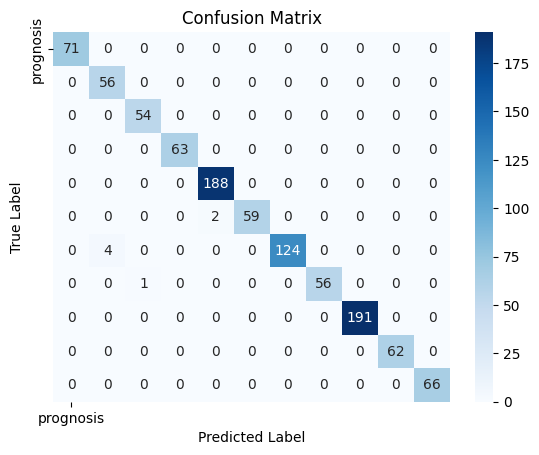

In [78]:
labels = sorted(list(set(y_test)))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## Model deployment

In [79]:
input_data=(data.iloc[0:1,:50])
input_data_as_array=np.asarray(input_data)
input_data_as_array_2d=input_data_as_array.reshape(1,-1)
input_data=sc.transform(input_data_as_array)

In [80]:
prediction=model.predict(input_data)
prediction

array([4])

In [81]:
prediction_decoded=l.inverse_transform(prediction)

In [82]:
prediction_decoded

array(['Heart Attack'], dtype=object)

In [83]:
import pickle

In [84]:
filename='weather_related_diseases.sav'
pickle.dump(model,open(filename,'wb'))

In [85]:
loaded_model=pickle.load(open(filename,'rb'))
loaded_model

RandomForestClassifier(bootstrap=False, min_samples_split=5, n_estimators=300)

In [86]:
import gradio as gr

In [87]:
target_column = 'prognosis' 
feature_columns = [col for col in data.columns if col != target_column]

model = pickle.load(open(r"C:\Users\sanik\weather_related_diseases.sav", 'rb'))

# Define prediction function
def predict_from_input(*args):
    input_data = np.array(args).reshape(1, -1)
    input_data=sc.transform(input_data)
    prediction = model.predict(input_data)
    return l.inverse_transform(prediction)

# Dynamically generate input components for Gradio
inputs = [gr.Number(label=col) for col in feature_columns]

# Create Gradio interface
iface = gr.Interface(
    fn=predict_from_input,
    inputs=inputs,
    outputs='text',
    title='weather related disease prediction',
    description='Enter the input values to predict disease.'
)

iface.launch(share=True)

* Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.
